In [1]:
import numpy as np

In [2]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [147]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # petal length & petal width
y = (iris["target"]==1).astype(np.int32)
#y = iris["target"]

In [151]:
model = Pipeline([
    ("scaler", StandardScaler()),
    #("linear_svm", LinearSVC(C=1, loss="hinge", random_state=55))
    #("linear_svm", SVC(C=1, kernel="linear", random_state=55))
    ("nonlinear_svm", SVC(C=1, kernel="rbf", random_state=55))
])
model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('nonlinear_svm', SVC(C=1, random_state=55))])

In [152]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

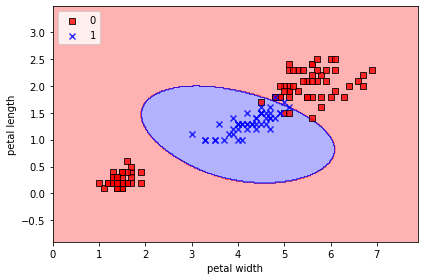

In [153]:
plot_decision_regions(X=X, y=y, classifier=model)
plt.xlabel("petal width")
plt.ylabel("petal length")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [139]:
model.predict([[3, 0.5], [4, 0.5]])

array([0, 0])

In [140]:
model.decision_function([[3, 0.5], [4, 0.5]])

array([[ 0.06273943, -0.98127949, -5.40703694],
       [-0.65825303, -0.96031139, -4.47870456]])

In [141]:
print(model.steps[1][1].coef_)
print(model.steps[1][1].intercept_)

[[-1.26851706 -1.06697796]
 [ 0.03689136 -0.0330041 ]
 [ 1.63331177  2.38789274]]
[-1.46597701 -0.99576752 -2.50519172]


In [142]:
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
predictions = model.predict(X)

In [108]:
print(confusion_matrix(y, predictions))

[[98  2]
 [ 4 46]]


In [109]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.96      0.96       150



In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
param_grid = { "C":[0.1, 1, 10, 100, 1000], "loss":["hinge", "squared_hinge"] }

In [126]:
scaler = StandardScaler()
scaler.fit(X)
X_t = scaler.transform(X)

In [127]:
grid = GridSearchCV(LinearSVC(max_iter=1000000, random_state=55), param_grid, verbose=3)

In [128]:
grid.fit(X_t, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..............................C=0.1, loss=hinge; total time=   0.0s
[CV 2/5] END ..............................C=0.1, loss=hinge; total time=   0.0s
[CV 3/5] END ..............................C=0.1, loss=hinge; total time=   0.0s
[CV 4/5] END ..............................C=0.1, loss=hinge; total time=   0.0s
[CV 5/5] END ..............................C=0.1, loss=hinge; total time=   0.0s
[CV 1/5] END ......................C=0.1, loss=squared_hinge; total time=   0.0s
[CV 2/5] END ......................C=0.1, loss=squared_hinge; total time=   0.0s
[CV 3/5] END ......................C=0.1, loss=squared_hinge; total time=   0.0s
[CV 4/5] END ......................C=0.1, loss=squared_hinge; total time=   0.0s
[CV 5/5] END ......................C=0.1, loss=squared_hinge; total time=   0.0s
[CV 1/5] END ................................C=1, loss=hinge; total time=   0.0s
[CV 2/5] END ................................C=1

GridSearchCV(estimator=LinearSVC(max_iter=1000000, random_state=55),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [129]:
grid.best_estimator_

LinearSVC(C=0.1, max_iter=1000000, random_state=55)

In [130]:
grid.best_params_

{'C': 0.1, 'loss': 'squared_hinge'}

In [131]:
grid.best_score_

0.96

In [132]:
predictions = grid.best_estimator_.predict(X_t)

In [133]:
print(confusion_matrix(y, predictions))

[[97  3]
 [ 4 46]]


In [134]:
print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

